In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import re
from Util.data_helper import load

sns.set()
%matplotlib inline

In [38]:
# Load DataFrames
categories = ['Kindle', 'Magazine']
frames = []
for category in categories:
    for root, dirs, files in os.walk(category + '/'):
        for name in files:
            if re.match(r"DataFrame.pkl", name):
                frames.append(load(root + '/' + name))
data = pd.concat(frames, ignore_index=True)
data.loc[data['model_type']=='Unif_Sampling', 'model_type'] = 'Uniform'
data.loc[data['model_type']=='Logreg_Baseline_1_layer', 'model_type'] = 'Log. Regr.'
data.loc[data['model_type']=='Logreg_SentEmbs_1_layer', 'model_type'] = 'SentEmbs'
data.loc[data['context']=='no_context', 'context'] = 'No Context'
data.loc[data['context']=='train_sent_embs', 'context'] = 'Using Context'
data.loc[data['category']=='Magazine_Subs', 'category'] = 'Magazine Subscriptions'
data.rename(columns = {'model_type': 'Model Type', 'category': 'Category'}, inplace = True)

data

,accuracy,prob_pos,prob_neg,ace_error,dataset,Category,Model Type,context,test_set_num_prods,flic_dim,sent_emb_dim,num_target_sentences,num_samples_per_link,regularizer,gen_num_layers,gen_num_units,enc_num_layers,enc_num_units,gen_dropout,enc_dropout
0,0.803149,0.720530,0.282874,0.445232,train,Kindle,DPP,train_context,True,200,256,3.0,5.302906,0.005,1,256,1,256,0.0,0.0
1,0.817825,0.721305,0.269770,0.432077,train,Kindle,DPP,train_context,True,200,256,3.0,4.352535,0.005,1,256,1,256,0.0,0.0
2,0.824025,0.727281,0.269813,0.424653,train,Kindle,DPP,train_context,True,200,256,3.0,3.784004,0.005,1,256,1,256,0.0,0.0
3,0.808873,0.710514,0.277853,0.444289,train,Kindle,DPP,train_context,True,200,256,3.0,3.666007,0.005,1,256,1,256,0.0,0.0
4,0.826596,0.731764,0.268572,0.422400,train,Kindle,DPP,train_context,True,200,256,3.0,3.528476,0.005,1,256,1,256,0.0,0.0
5,0.793560,0.717178,0.289766,0.459198,valid,Kindle,DPP,train_context,True,200,256,3.0,5.383850,0.005,1,256,1,256,0.0,0.0
6,0.809312,0.713615,0.276050,0.452998,valid,Kindle,DPP,train_context,True,200,256,3.0,4.336203,0.005,1,256,1,256,0.0,0.0
7,0.805901,0.718694,0.288628,0.462661,valid,Kindle,DPP,train_context,True,200,256,3.0,3.827563,0.005,1,256,1,256,0.0,0.0
8,0.805238,0.708375,0.286911,0.465764,valid,Kindle,DPP,train_context,True,200,256,3.0,3.670484,0.005,1,256,1,256,0.0,0.0
9,0.814322,0.719716,0.275275,0.449624,valid,Kindle,DPP,train_context,True,200,256,3.0,3.542275,0.005,1,256,1,256,0.0,0.0


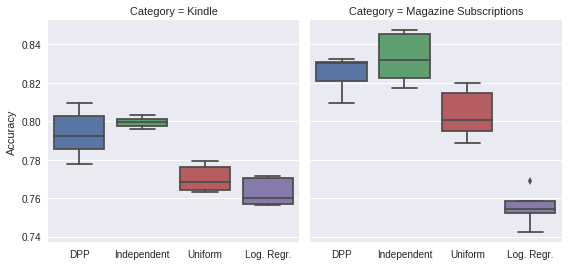

In [40]:
# Comparing models

test = data['dataset'] == 'test'
Kindle = data['Category'] == 'Kindle'
Magazine = data['Category'] == 'Magazine Subscriptions'

context = data['context'] == 'train_context'
testset = data['test_set_num_prods'] == False
num_sents3 = data['num_target_sentences'] == 3
model = (data['Model Type'] == 'DPP') | (data['Model Type'] == 'Uniform') | \
        (data['Model Type'] == 'Independent') | (data['Model Type'] == 'Log. Regr.') | (data['Model Type'] == 'SentEmbs')
DF_Kindle = data[test & context & testset & model & num_sents3 & Kindle]  
DF_Magazine = data[test & context & testset & model & num_sents3 & Magazine]
DF = data[test & context & testset & model & num_sents3]

s =  sns.factorplot('Model Type',"accuracy", col='Category', data=DF, kind="box", order=['DPP', 'Independent', 'Uniform', 'Log. Regr.',])
s.set_axis_labels("", "Accuracy");
#s =  sns.factorplot("model_type","accuracy", data=DF_Kindle, kind="box", order=['DPP', 'Independent', 'Uniform', 'Log. Regr.',])
#s.set_axis_labels("Kindle", "Accuracy");
#s =  sns.factorplot("model_type","accuracy", data=DF_Magazine, kind="box", order=['DPP', 'Independent', 'Uniform', 'Log. Regr.'])
#s.set_axis_labels("Magazine", "Accuracy");



,accuracy,prob_pos,prob_neg,ace_error,dataset,Category,Model Type,context,test_set_num_prods,flic_dim,sent_emb_dim,num_target_sentences,num_samples_per_link,regularizer,gen_num_layers,gen_num_units,enc_num_layers,enc_num_units,gen_dropout,enc_dropout
100,0.762282,0.650144,0.334274,0.516195,test,Kindle,DPP,No Context,False,200,256,3.0,2.958019,0.005,1,256,1,256,0.0,0.0
101,0.755989,0.644364,0.336187,0.522405,test,Kindle,DPP,No Context,False,200,256,3.0,2.779192,0.005,1,256,1,256,0.0,0.0
102,0.777913,0.651815,0.321188,0.509751,test,Kindle,DPP,No Context,False,200,256,3.0,3.175477,0.005,1,256,1,256,0.0,0.0
103,0.765530,0.656588,0.340579,0.520338,test,Kindle,DPP,No Context,False,200,256,3.0,3.160901,0.005,1,256,1,256,0.0,0.0
104,0.779334,0.660348,0.322214,0.501879,test,Kindle,DPP,No Context,False,200,256,3.0,3.059095,0.005,1,256,1,256,0.0,0.0
130,0.786033,0.663347,0.364372,0.534993,test,Kindle,DPP,Using Context,False,200,256,3.0,1.498406,0.005,1,256,1,256,0.0,0.0
131,0.773244,0.674980,0.360573,0.526866,test,Kindle,DPP,Using Context,False,200,256,3.0,1.495148,0.005,1,256,1,256,0.0,0.0
132,0.785018,0.651368,0.335797,0.524658,test,Kindle,DPP,Using Context,False,200,256,3.0,1.489149,0.005,1,256,1,256,0.0,0.0
133,0.773447,0.666512,0.360463,0.538265,test,Kindle,DPP,Using Context,False,200,256,3.0,1.444038,0.005,1,256,1,256,0.0,0.0
134,0.766951,0.662372,0.342385,0.527569,test,Kindle,DPP,Using Context,False,200,256,3.0,1.531336,0.005,1,256,1,256,0.0,0.0


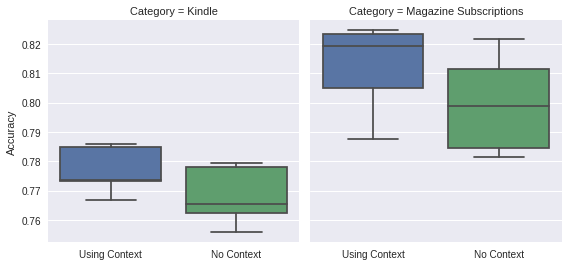

In [47]:
# Comparing with and without context
Kindle = data['Category'] == 'Kindle'
Magazine = data['Category'] == 'Magazine Subscriptions'

context = data['context'] != 'train_context'
no_context = data['context'] == 'No Context'
using_context = data['context'] == 'Using Context'
testset = data['test_set_num_prods'] == False
num_sents3 = data['num_target_sentences'] == 3
num_sents6 = data['num_target_sentences'] == 6
model = (data['Model Type'] == 'DPP')
DF_Kindle = data[test & context & testset & model & num_sents3 & Kindle]  
DF_Magazine = data[test & context & testset & model & num_sents3 & Magazine]

DF = data[test & context & num_sents3 & model]
#DF = data[test & ((no_context & num_sents3) | (using_context & num_sents6)) & testset & model]
#print(DF)
s = sns.factorplot("context","accuracy", col="Category", data=DF, kind="box", order=['Using Context', 'No Context'])
s.set_axis_labels("", "Accuracy");

DF
#s =  sns.factorplot("context","accuracy", data=DF_Kindle, kind="box")
#s.set_axis_labels("Kindle", "Accuracy");
#s =  sns.factorplot("context","accuracy", data=DF_Magazine, kind="box")
#s.set_axis_labels("Magazine", "Accuracy");


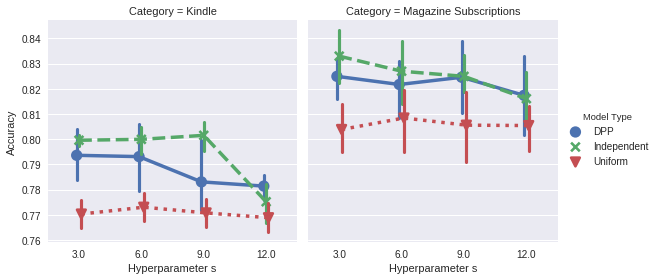

In [55]:
# Comparing num_sents
test = data['dataset'] == 'test'
Kindle = data['Category'] == 'Kindle'
Magazine = data['Category'] == 'Magazine Subscriptions'

context = data['context'] == 'train_context'
testset = data['test_set_num_prods'] == False
num_sents3 = data['num_target_sentences'] == 3
model = (data['Model Type'] == 'DPP') | (data['Model Type'] == 'Independent') | (data['Model Type'] == 'Uniform')
DF_Kindle = data[test & testset & context & model & Kindle]  
DF_Magazine = data[test & testset & model & context & Magazine]
DF = data[test & testset & model & context]

s = sns.factorplot("num_target_sentences", "accuracy", "Model Type", col='Category', data=DF, 
                   dodge=True, scale = 1.1,
                  markers=["o", "x", "v"], linestyles=["-", "--", ":"],
                  hue_order=['DPP','Independent','Uniform'])
s.set_axis_labels("Hyperparameter s", "Accuracy");
#s =  sns.factorplot("num_target_sentences", "accuracy", "model_type", data=DF_Magazine, legend=False)
#s.set_axis_labels("Number of Sampled Sentences", "Accuracy");

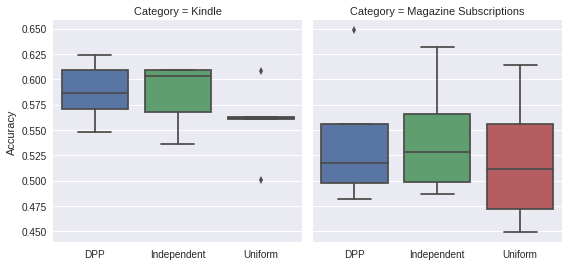

In [43]:
# Comparing New Test products
test = data['dataset'] == 'test'
Kindle = data['Category'] == 'Kindle'
Magazine = data['Category'] == 'Magazine Subscriptions'

context = data['context'] == 'train_context'
testset = data['test_set_num_prods'] == True
num_sents3 = data['num_target_sentences'] == 3
model = (data['Model Type'] == 'DPP') | (data['Model Type'] == 'Independent') | (data['Model Type'] == 'Uniform')
DF_Kindle = data[test & testset & context & model & num_sents3 & Kindle]  
DF_Magazine = data[test & testset & model & context & num_sents3 & Magazine]
DF = data[test & testset & model & context & num_sents3]


s =  sns.factorplot("Model Type", "accuracy", col='Category', data=DF, kind="box", order=['DPP', 'Independent', 'Uniform'])
s.set_axis_labels("", "Accuracy");

#s =  sns.factorplot("Model Type", "accuracy", data=DF_Kindle, kind="box", order=['DPP', 'Independent', 'Uniform'])
#s.set_axis_labels("dataset", "Accuracy");
#s =  sns.factorplot("Model Type", "accuracy", data=DF_Magazine, kind="box",  order=['DPP', 'Independent', 'Uniform'])
#s.set_axis_labels("dataset", "Accuracy");